# Phonons

Here code examples for phonons are provided. This part will be focused on the I/O and visualization of phonon-related properties. For thermodynamic properties, please refer to the thermodynamics module and for IR/Raman spectra, please refer to the spectra module.

## I/O methods in 'crystal_io.Crystal_output'

### The 'get_phonon' method

This method is defined in the `crystal_io.Crystal_output` class. It is a method developed for comprehensive and general proposes, which reads the standard screen output file of the 'crystal' executable.

Get $\Gamma$ point frequencies.

In [1]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('phono_paracetamolG.out')
out.get_phonon()

print('Number of q / k points: {:d}'.format(out.nqpoint))
print('Number of modes at Gamma: {:d}'.format(out.nmode[0]))
print('Frequency of the 4th mode at Gamma: {:.4f} THz'.format(out.frequency[0, 4]))

Number of q / k points: 1
Number of modes at Gamma: 240
Frequency of the 4th mode at Gamma: 1.2306 THz


Other usages of this method are mentioned in the corresponding modules.

### The 'get_phonon_band' method

This method is developed for quick substraction and instantiation of phonon dispersion data. It reads the screen output and returns to a `phonons.PhononBand` object.

In [2]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('phono_Gstrain0Band.out')
band = out.get_phonon_band()
print('Number of bands: {:d}'.format(band.n_bands))
print('Number of k points: {:d}'.format(band.n_kpoints))

Number of bands: 6
Number of k points: 123


### The 'get_phonon_dos' method

Similarly, this method reads phonon density of states from output file and returns to a `phonons.PhononDos` object.

Use `element_prj` to get projections onto species. Conventional atomic numbers are used.

In [3]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('phono_Gstrain0DOS.out')
dos = out.get_phonon_dos(element_prj=6)
print('Number of frequencies: {:d}'.format(dos.n_frequency))
print('Number of projections: {:d}'.format(dos.n_proj))

Number of frequencies: 200
Number of projections: 2


## The 'phonons' module

This module is developed for analysis and visualization of properties related to phonon dispersion and vibrations.

### The 'PhononBand' class

Similar to the `electronics.ElectronBand` class, the `PhononBand` class provides methods for quick instantiation and plotting. Note that even though frequencies are saved in THz, the default plotting unit is cm$^{-1}$.

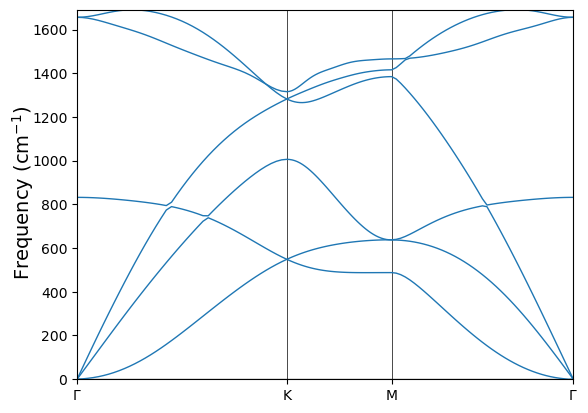

In [4]:
from CRYSTALpytools.phonons import PhononBand

fig = PhononBand.from_file('phono_Gstrain0Band.out').plot(
    k_label=[r'$\Gamma$', 'K', 'M', r'$\Gamma$'])

### The 'PhononDOS' class

With the similar set-ups, the user can visualize the phonon DOS. Use the `gauss` keyword to broaden the DOS peaks in the plot with Gaussian functions. It does not change the data saved in the object. The unit is commensurate with the plotting unit.

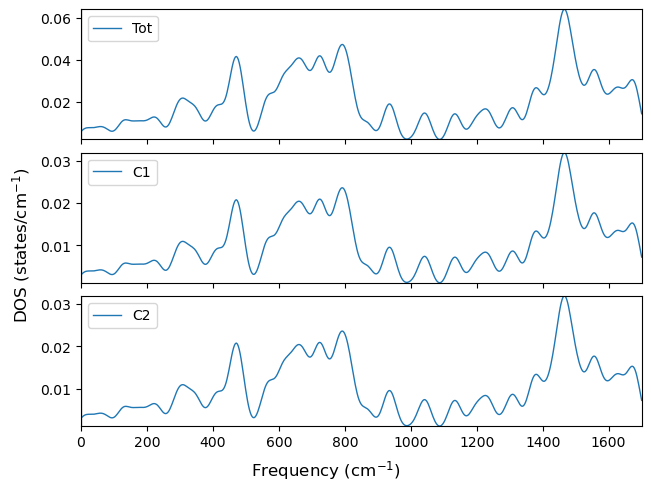

In [5]:
from CRYSTALpytools.phonons import PhononDOS

fig = PhononDOS.from_file('phono_Gstrain0DOS.out', atom_prj=[1,2]).plot(
    gauss=20., dos_label=['Tot', 'C1', 'C2'], legend='upper left')

## The 'PhononBandDOS' class

Use the `PhononBandDOS` class for the combined band-dos plot. It accepts either 1 output file with both band and dos data or 2 files, the first for band and the second for dos. Keywords of `from_file()` of band / dos are accepted here.

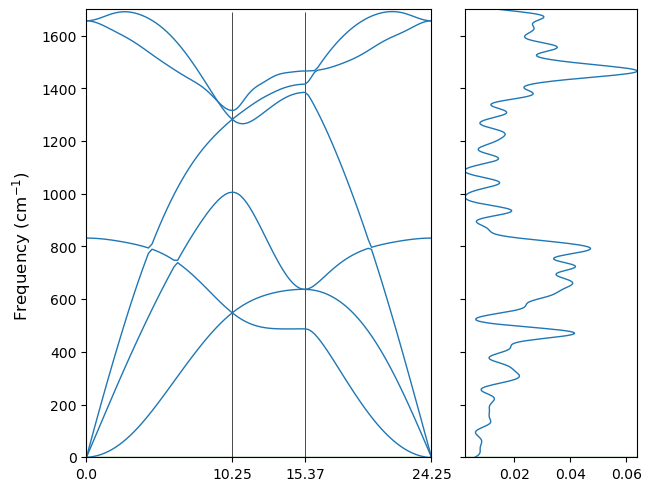

In [6]:
from CRYSTALpytools.phonons import PhononBandDOS

fig = PhononBandDOS.from_file('phono_Gstrain0Band.out', 'phono_Gstrain0DOS.out'
                             ).plot(dos_gauss=20.)

## Functions in the 'plot' module

Just as other cases, functions defined in the `plot` module supports a higher-level manipulation of data from different systems.

### The 'plot_phonon_bands()' function

Plot the phonon dispersions of flat graphene under compressive strains. The `q_overlap_tol` keyword is accepted and applied to all the 'filename' entries.

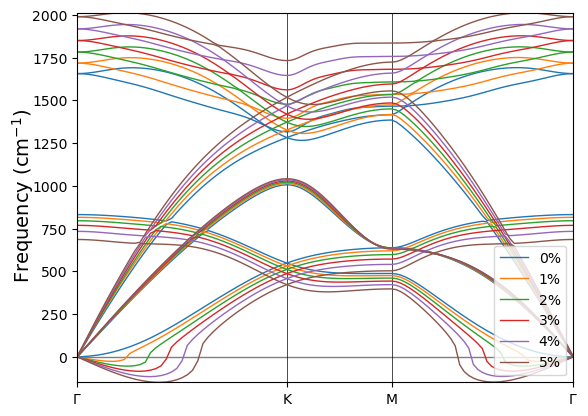

In [7]:
from CRYSTALpytools.plot import plot_phonon_bands

files = ['phono_Gstrain0Band.out', 'phono_Gstrain1Band.out', 'phono_Gstrain2Band.out',
         'phono_Gstrain3Band.out', 'phono_Gstrain4Band.out', 'phono_Gstrain5Band.out',]
fig = plot_phonon_bands(*files, k_label=[r'$\Gamma$', 'K', 'M', r'$\Gamma$'],
                        mode='multi',
                        band_label=['0%', '1%', '2%', '3%', '4%', '5%'])

### The 'plot_phonon_doss()' function

Phonon density of states of the same system. The `read_INS`, `atom_prj` and `element_prj` keywords are accepted and applied to all the filename entries.

Read projections onto 2 atoms but plot the total projection only.

**NOTE**:

1. Due to the setups of the input file, DOS lower than 0 is not calculated.  
2. The `dos_label` is used for projections in the same panel, therefore no annotations is available for strains.

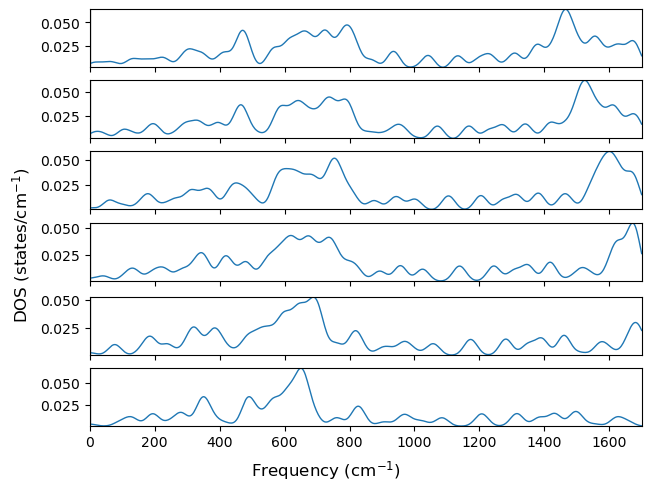

In [8]:
from CRYSTALpytools.plot import plot_phonon_doss

files = ['phono_Gstrain0DOS.out', 'phono_Gstrain1DOS.out', 'phono_Gstrain2DOS.out',
         'phono_Gstrain3DOS.out', 'phono_Gstrain4DOS.out', 'phono_Gstrain5DOS.out',]
fig = plot_phonon_doss(*files, atom_prj=[1,2], overlap=False,
                       prj=1, gauss=20.0)

### The 'plot_phonon_banddos()' function

This function is the combination of the `from_file()` method and the `plot()` method of the `phonons.PhononBandDOS` class, since multi-system plot is not available.

Note that the band range is limited due to the DOS range.

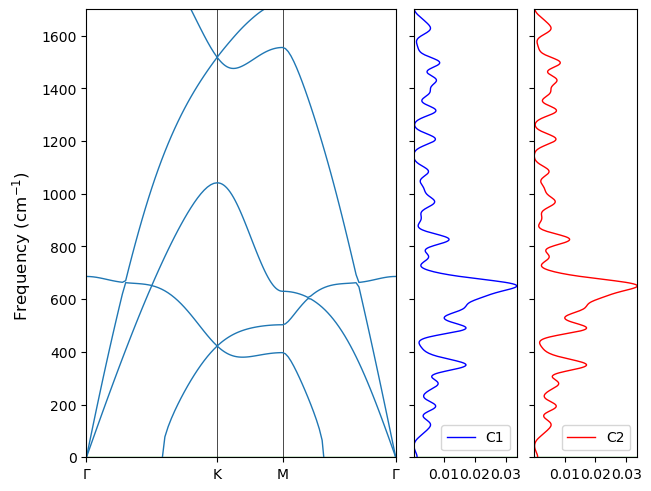

In [9]:
from CRYSTALpytools.plot import plot_phonon_banddos

fig = plot_phonon_banddos('phono_Gstrain5Band.out', 'phono_Gstrain5DOS.out',
                          atom_prj=[1,2], dos_gauss=20.0,
                          k_label=[r'$\Gamma$', 'K', 'M', r'$\Gamma$'],
                          dos_overlap=False, dos_prj=[2,3], dos_color=['blue', 'red',],
                          dos_label=['C1', 'C2'], band_width=3)

For more details, please refer to the module specific documentations.